In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
matplotlib.rc('font', family='arial') 

In [50]:
from numpy import correlate

In [87]:
from pandas import Series, DataFrame

In [275]:
from scipy.interpolate import interp1d

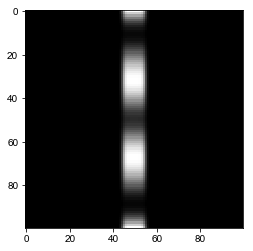

In [484]:
from scipy.ndimage import gaussian_filter1d
gain_s = 100
gain_t = 100
gain_landscape = np.zeros([gain_t,gain_s])
knots = np.random.rand(7)
knots[::2] = 1
x = np.linspace(0,9, len(knots))
interper = interp1d(x, knots, kind='cubic')
gain_modulator = interper(np.linspace(0,9,gain_landscape.shape[0])).clip(0,1)
gain_landscape[:,gain_s // 2 - 5 : gain_s // 2 + 5] = 1
gain_landscape = 1-(gain_landscape.T * gain_modulator).T
gain_landscape = gaussian_filter1d(gain_landscape, sigma=1, axis=1)
plt.imshow(gain_landscape, cmap='gray_r')

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b76db97c9e8>,
      dtype=object)

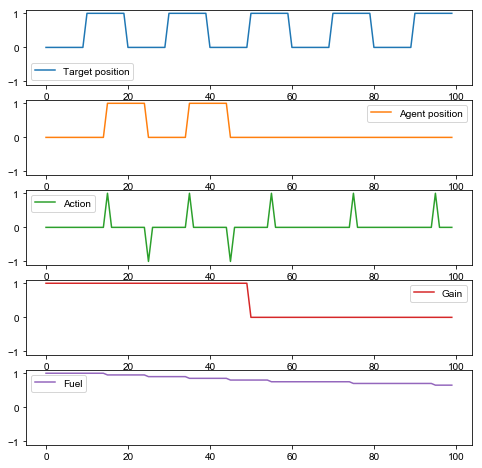

In [358]:
trace_names = ['Target position', 'Agent position', 'Vigor', 'Meta-vigor', 'Action', 'Gain', 'Fuel']
#inter-action interval
iai = 10
t = np.arange(gain_s)
action_inds = iai//2 + t[::iai]
current = np.zeros(t.shape)

target = (t // 10) % 2

action = np.zeros(t.shape)
fuel = np.ones(t.shape)
action_cost = .05
for act in action_inds:
    action_needed = abs(target[act] - current[act]) > 0
    if action_needed:
        fuel[act:] -= action_cost
        action[act] += (target[act] - current[act])
        current[act:] += (target[act] - current[act]) * gain[act]
    
df = DataFrame(np.vstack([target, current, action,gain,  fuel]).T, index=t, columns=trace_names)
fig,axs = plt.subplots(figsize=(8,8))
df.plot(subplots=True, ax=axs, sharey=True)